In [29]:
import numpy as np
from scipy.interpolate import griddata
from Utilities.operators import make_tree
import matplotlib.pyplot as plt

In [30]:
gamma = 5/3
mach_min = 1.3
save = True
folder = 'sedov'
snap = '100'
path = f'{folder}/{snap}'

In [31]:
# Test
numbers = np.arange(0.,20.)
x_test, y_test = np.meshgrid(numbers, numbers)
x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)
points_test = np.array([x_test, y_test])
f = x_test**2 + y_test**2

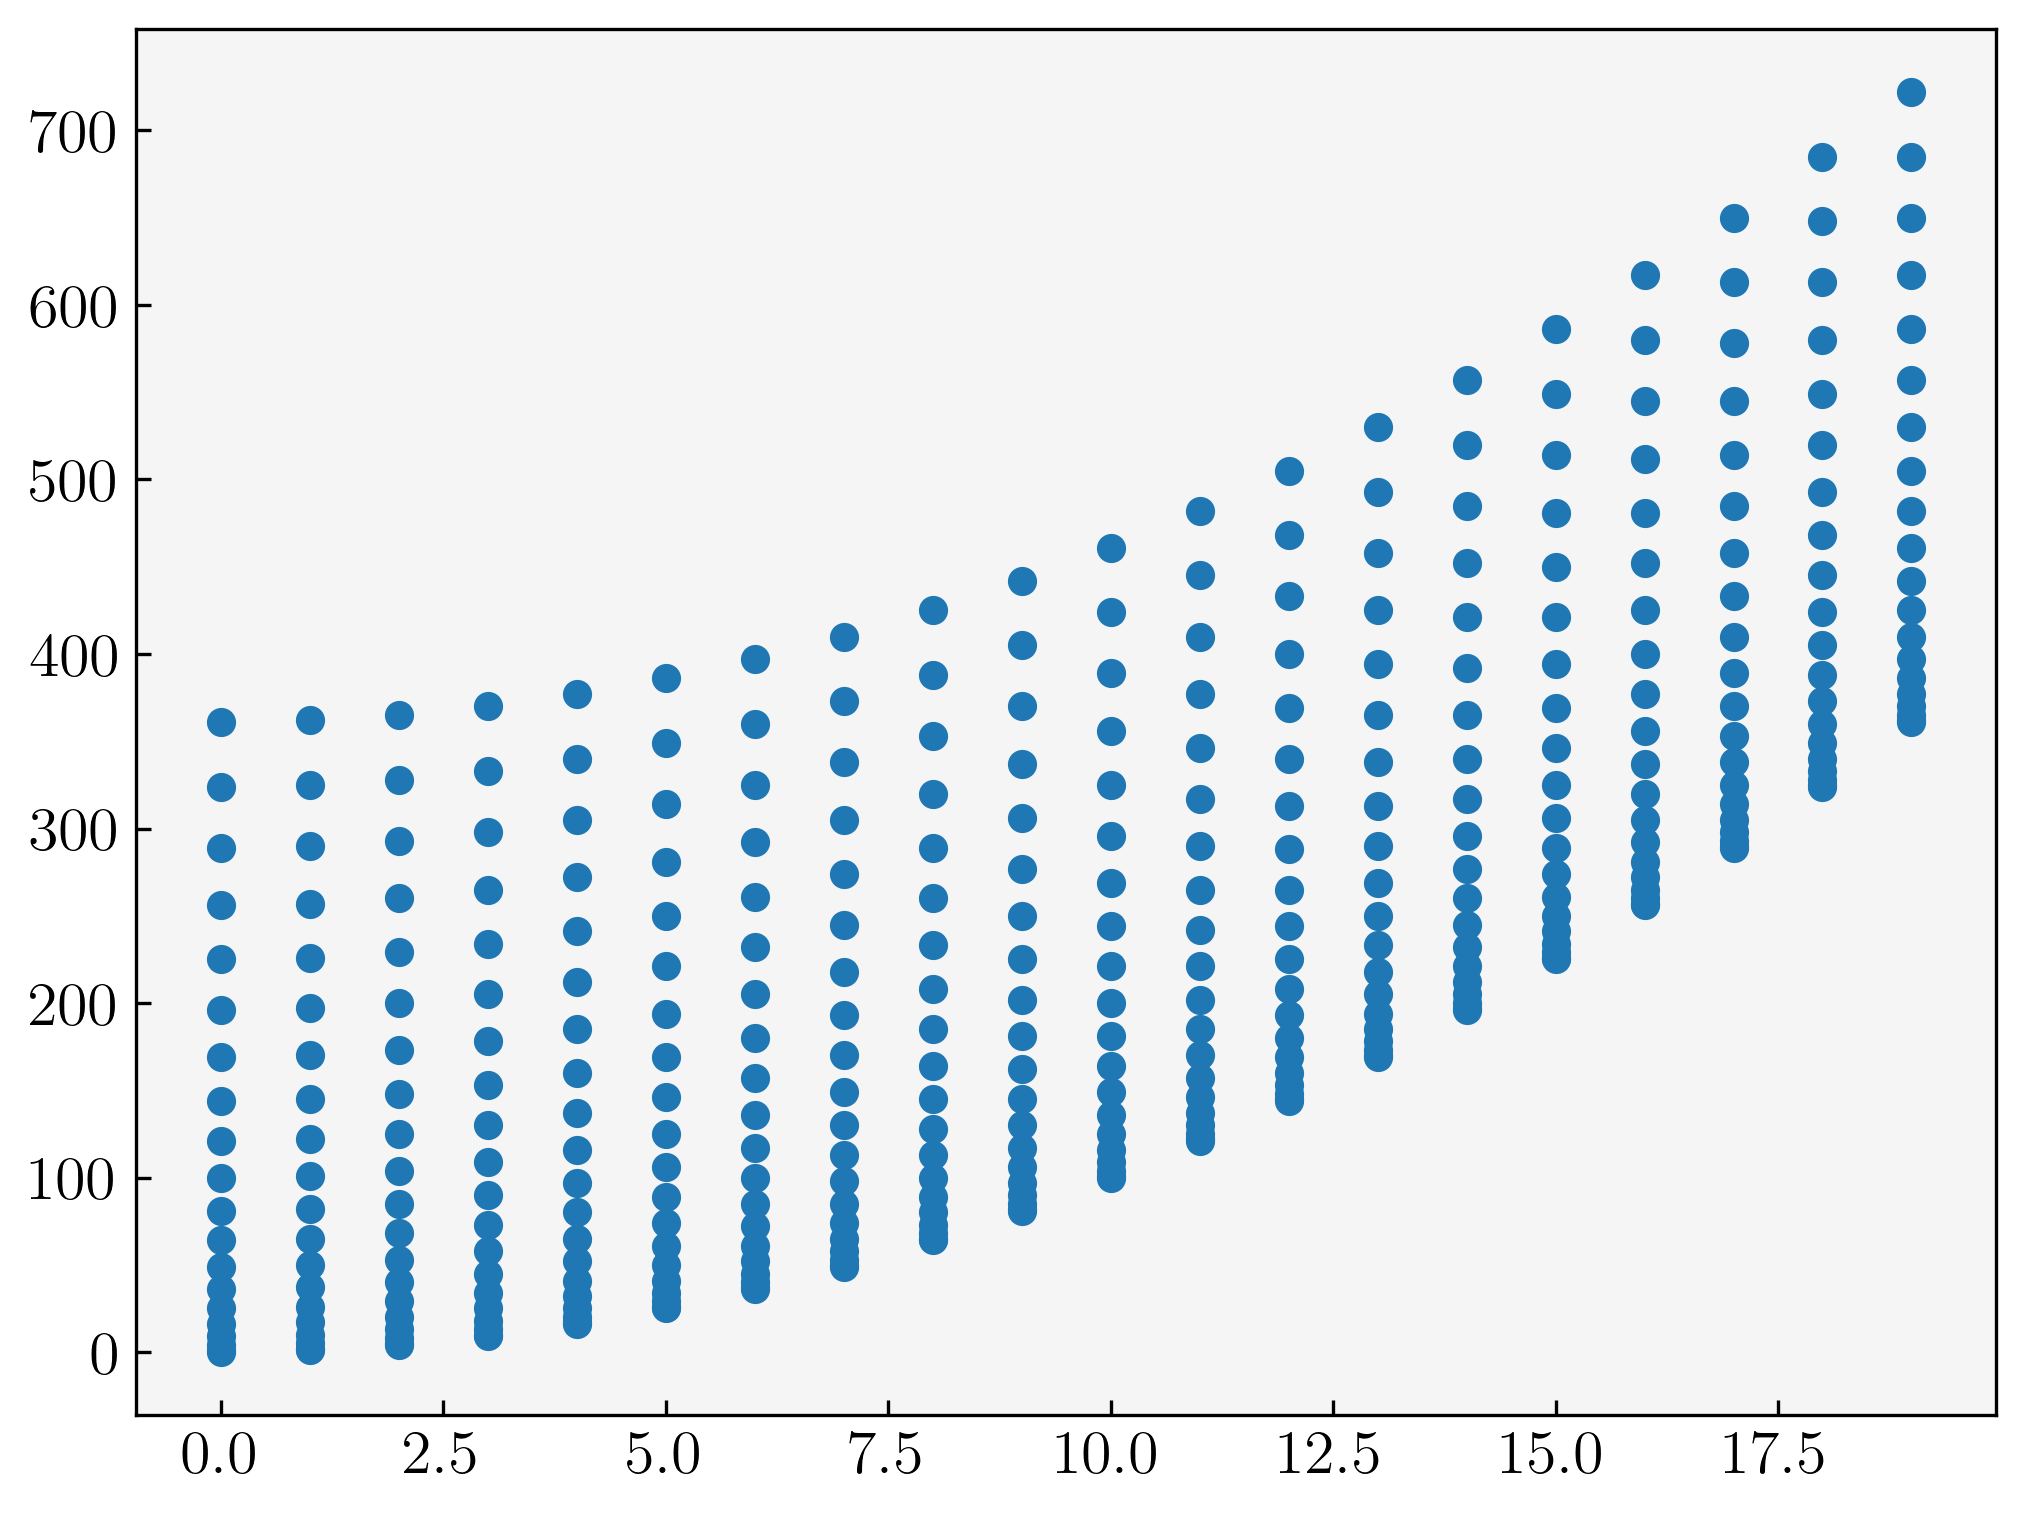

In [32]:
plt.scatter(x_test,f)

In [33]:
f_interp = griddata(points_test.T, f, np.array([1.5,2.25]))#, method = 'cubic')
f_interp

array([7.75])

In [34]:
sim_tree, X, Y, Z, Vol, VX, VY, VZ, Den, Press, Temp = make_tree(path, snap, False)
condition = np.abs(Z)<Vol**(1/3)
X_cond = X[condition]
Y_cond = Y[condition]
Z_cond = Z[condition]
Press_cond = Press[condition]

points = (np.array([X_cond, Y_cond, Z_cond])).T

all T=0, bro. Compute by myself!


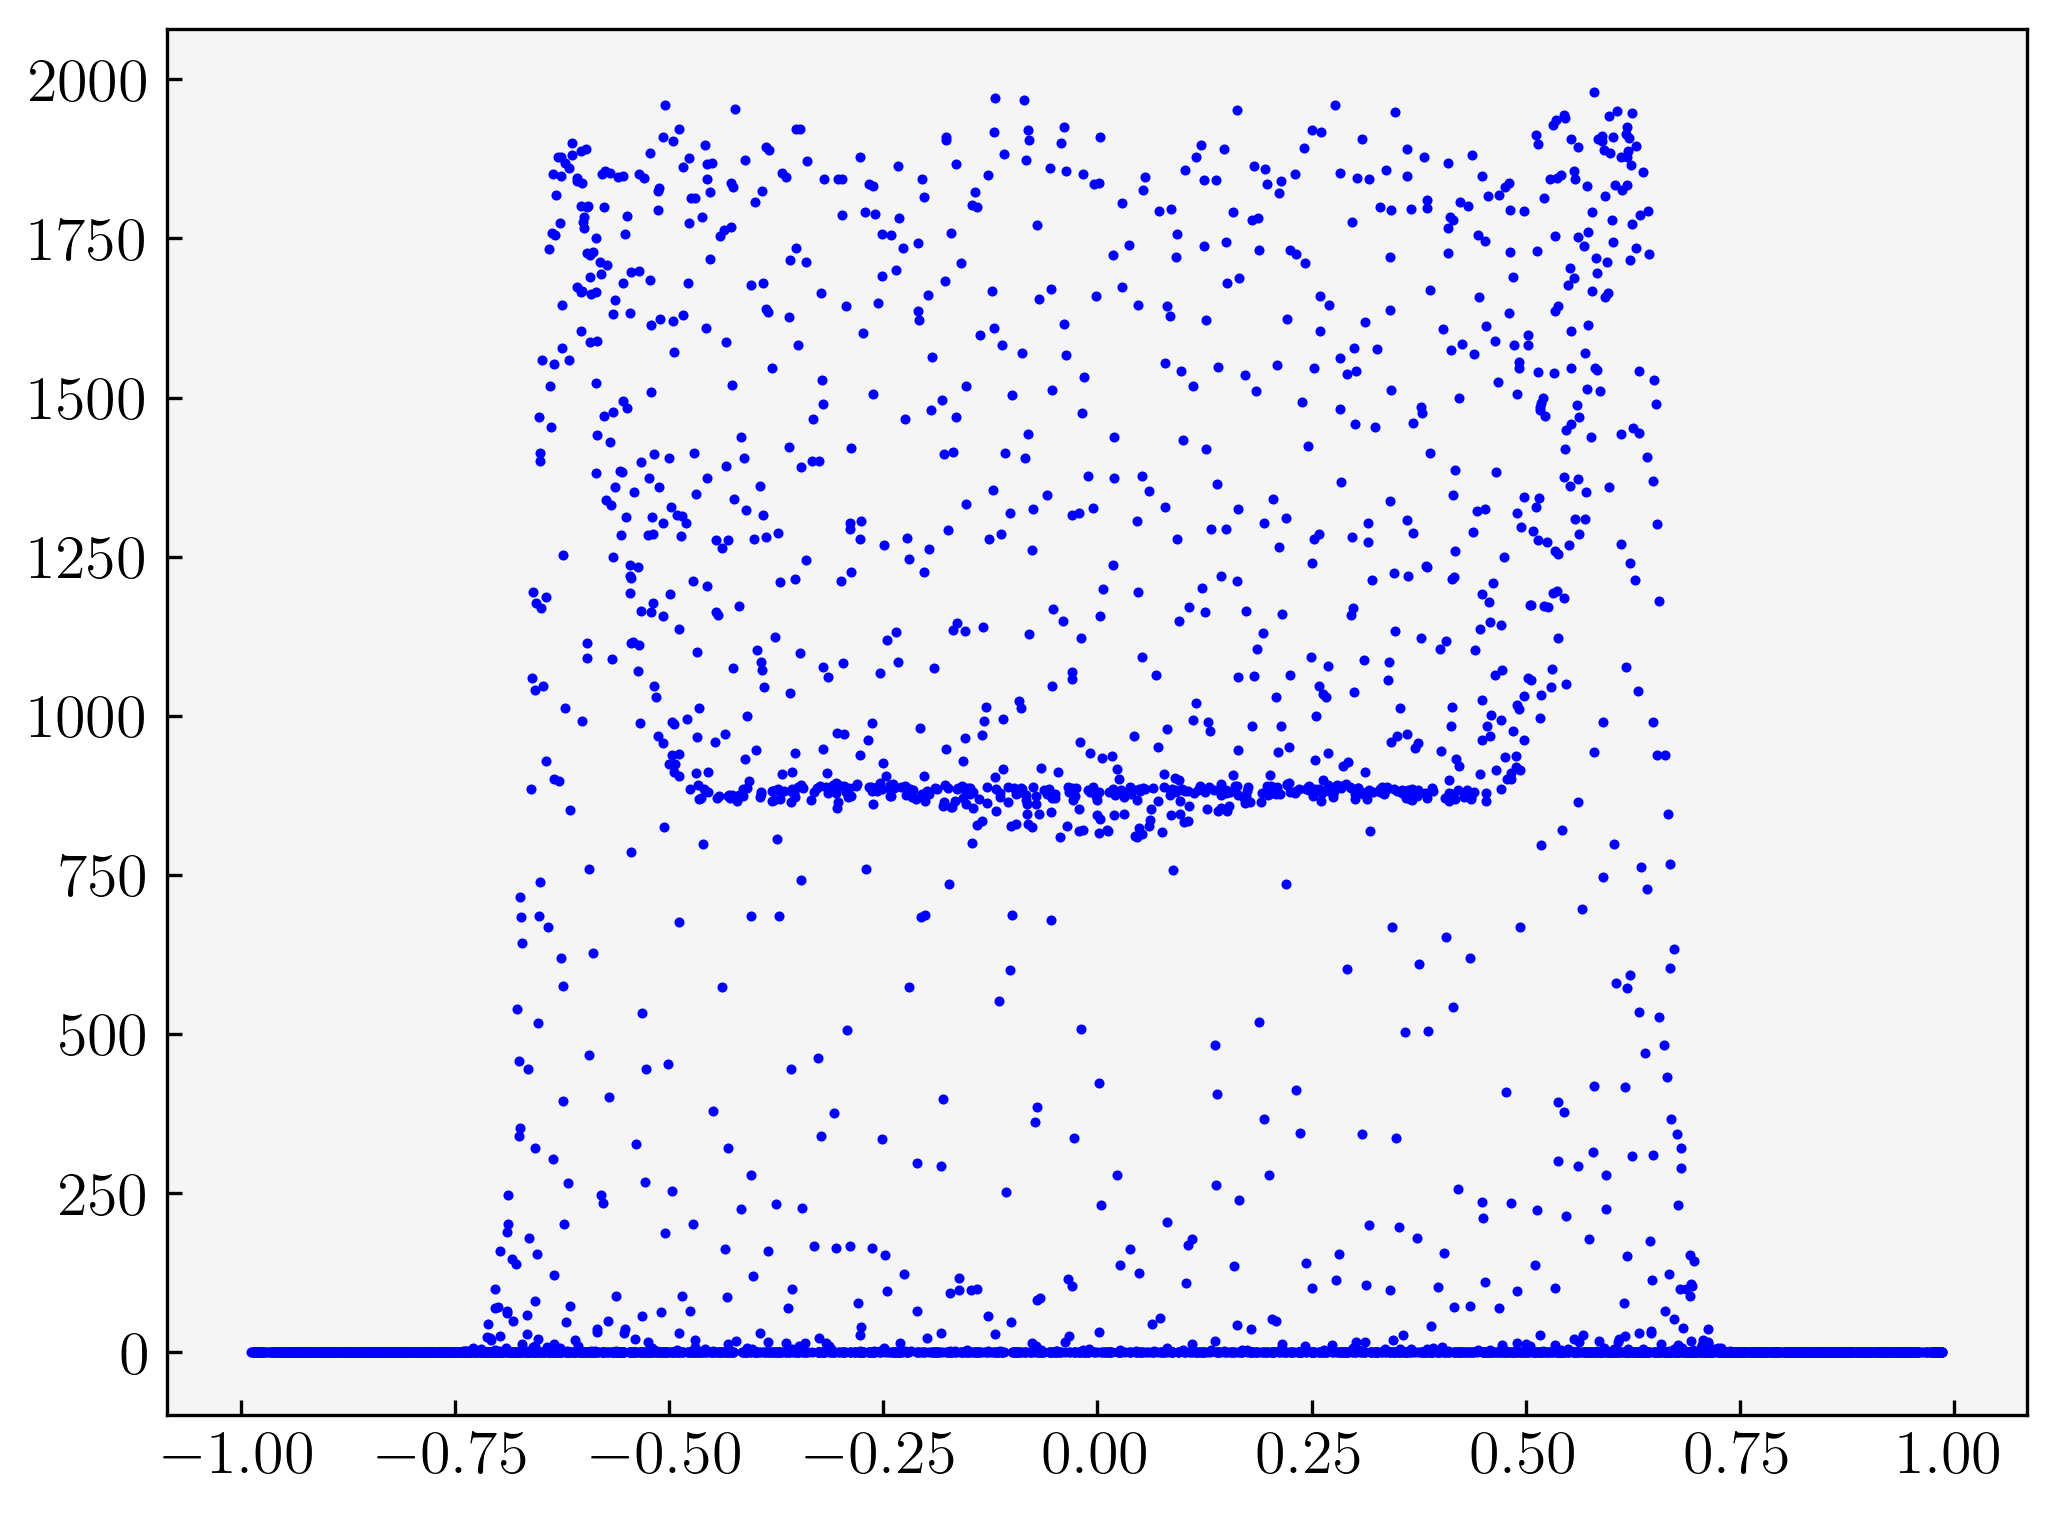

In [40]:
plt.figure()
img = plt.scatter(X_cond, Press_cond, s = 2, c = 'b')

In [67]:
x_tosearch = [0.2,0.9, 0]
y_tosearch = [0.2, 0.8, 0.6]
z_tosearch = [0,0.01, 0.]
to_search = np.array([x_tosearch, y_tosearch, z_tosearch]).T

In [68]:
f_interp = griddata(points, Press_cond, to_search)#, method = 'cubic')

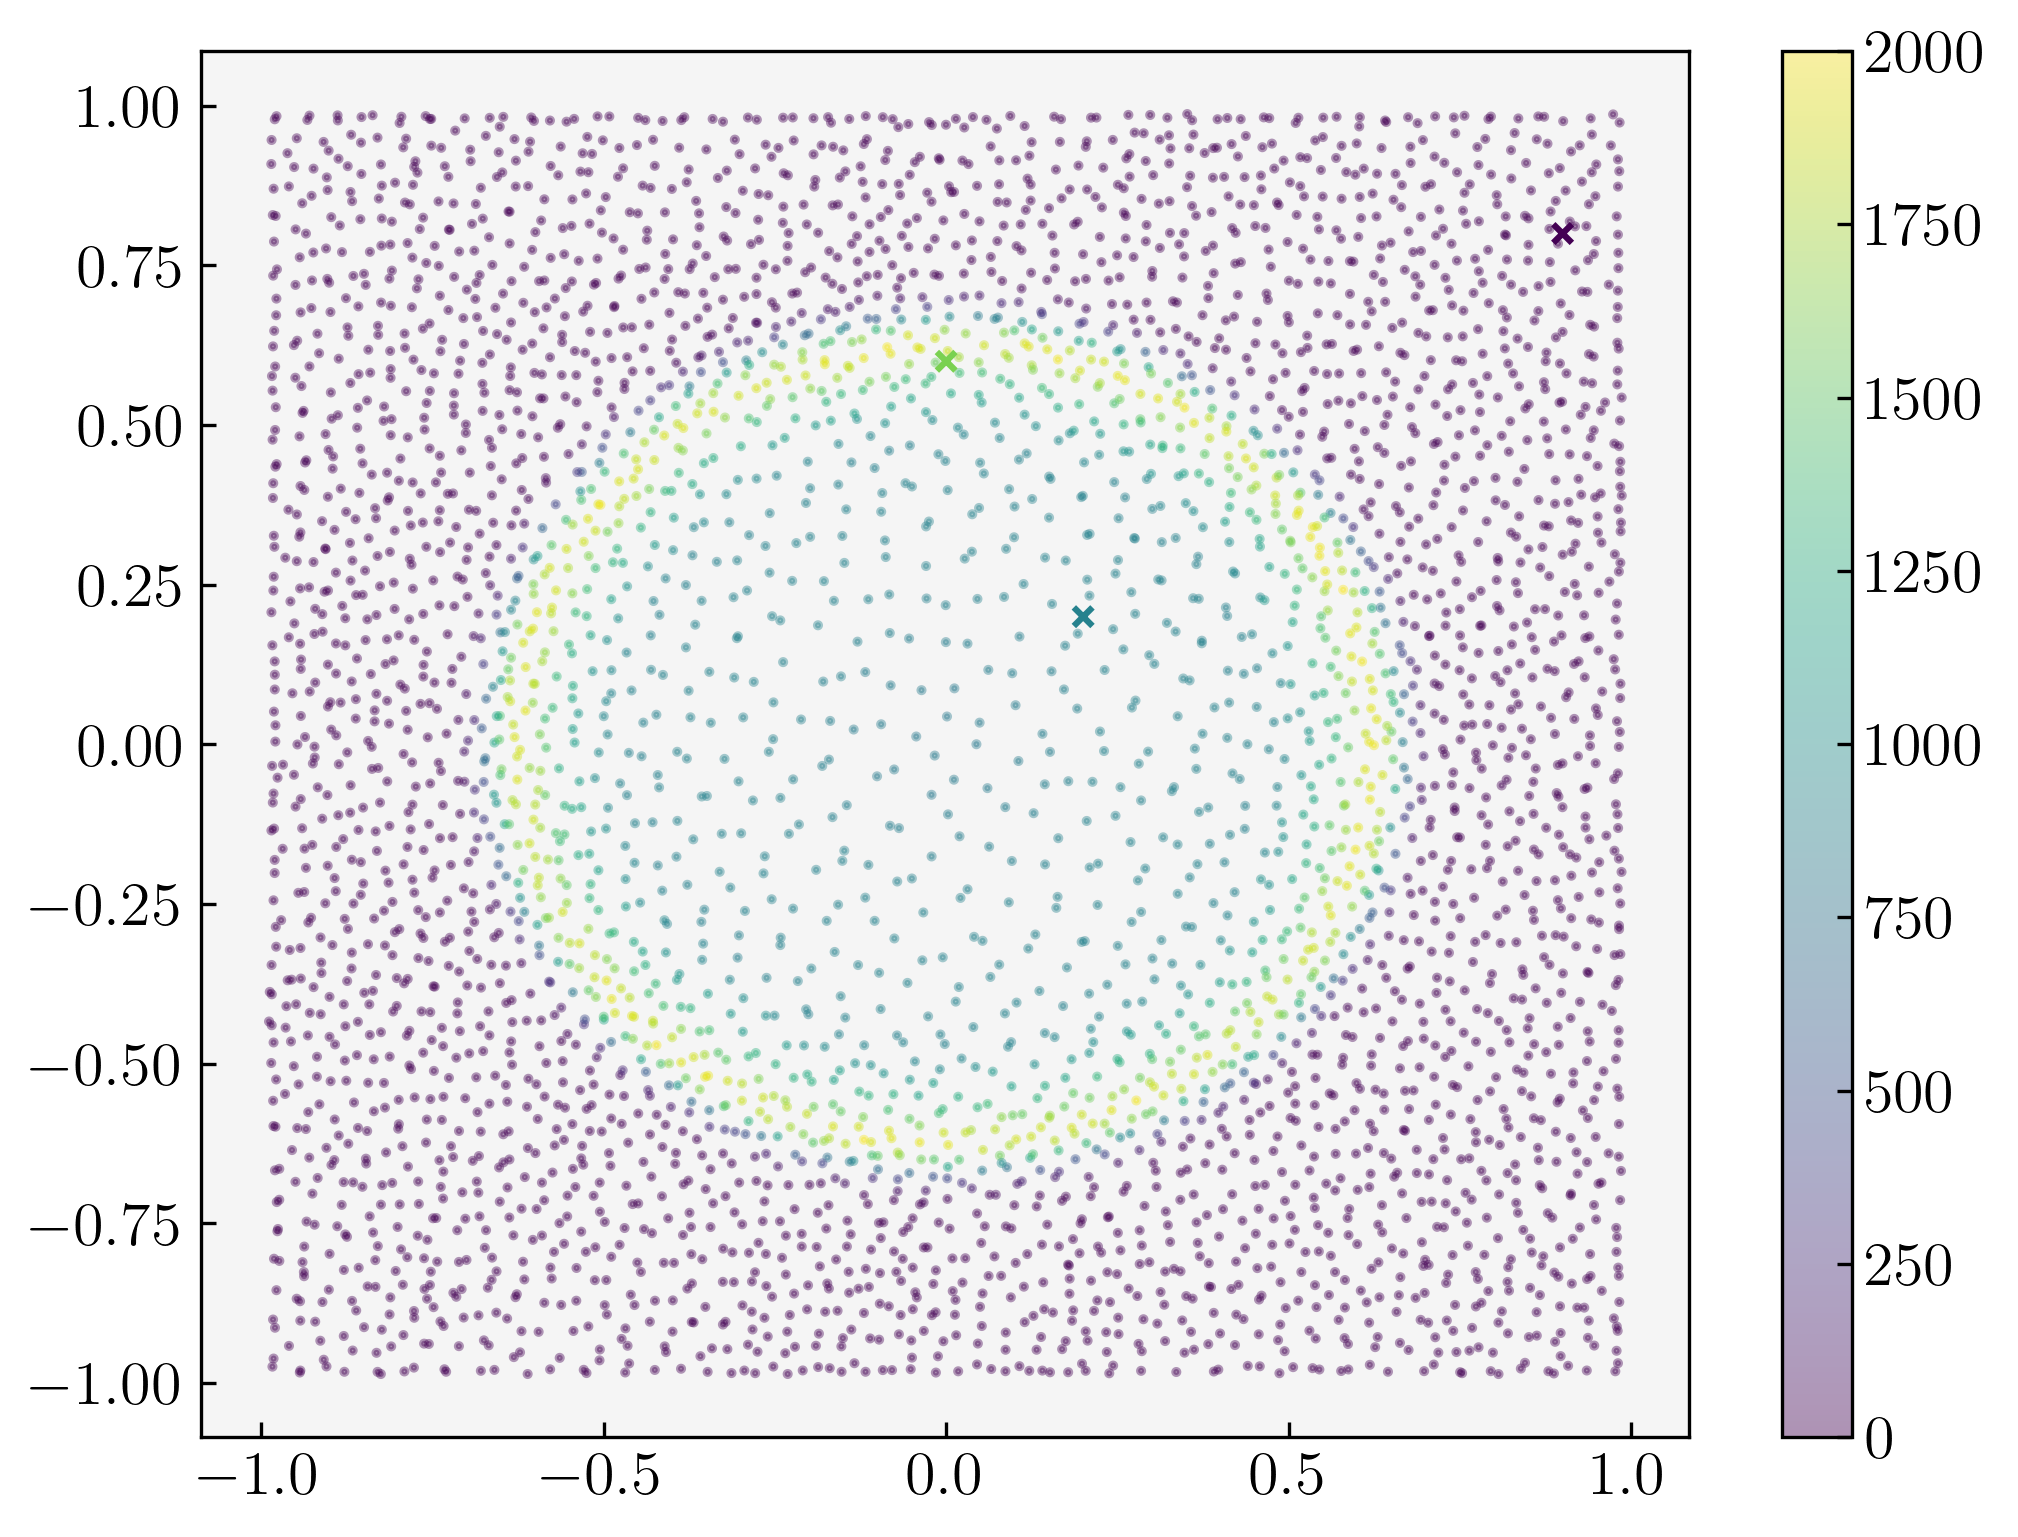

In [69]:
vmin = 0
vmax = 2000
fig, ax = plt.subplots()
img = ax.scatter(X_cond, Y_cond, c= Press_cond, s = 2, alpha = 0.4, vmin = vmin, vmax = vmax)
ax.scatter(x_tosearch, y_tosearch, c = f_interp, marker = 'x', s = 20, vmin = vmin, vmax = vmax)
plt.colorbar(img)
